**Tabular Dataset - Ground Water Quality**

**Exploratory Data Analysis (EDA)**

Initial Data Overview

In [ ]:
import pandas as pd

# Load the dataset
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('ground_water_quality_2018_post.csv')

# Initial data overview
data_head = data.head()
data_shape = data.shape
data_info = data.info()
data_description = data.describe(include='all')

data_head, data_shape

Saving ground_water_quality_2018_post.csv to ground_water_quality_2018_post.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               374 non-null    int64  
 1   district          374 non-null    object 
 2   mandal            374 non-null    object 
 3   village           374 non-null    object 
 4   lat_gis           374 non-null    float64
 5   long_gis          374 non-null    float64
 6   gwl               371 non-null    float64
 7   season            374 non-null    object 
 8   pH                374 non-null    float64
 9   E.C               374 non-null    int64  
 10  TDS               374 non-null    float64
 11  CO3               374 non-null    int64  
 12  HCO3              374 non-null    float64
 13  Cl                374 non-null    int64  
 14  F                 374 non-null    float64
 15  NO3        

(   sno  district       mandal      village    lat_gis   long_gis   gwl  \
 0    1  ADILABAD     Adilabad     Adilabad  19.668300  78.524700  5.09   
 1    2  ADILABAD  Bazarhatnur  Bazarhatnur  19.458888  78.350833  5.10   
 2    3  ADILABAD  Gudihatnoor  Gudihatnoor  19.525555  78.512222  4.98   
 3    4  ADILABAD      Jainath      Jainath  19.730555  78.640000  5.75   
 4    5  ADILABAD      Narnoor      Narnoor  19.495665  78.852654  2.15   
 
               season    pH   E.C  ...    SO4     Na    K  Ca      Mg  \
 0  postmonsoon 2018   8.28   745  ...   46.0   49.0  4.0  48  38.896   
 1  postmonsoon 2018   8.29   921  ...   68.0   42.0  5.0  56  63.206   
 2  postmonsoon 2018   7.69   510  ...   44.0   45.0  2.0  24  38.896   
 3  postmonsoon 2018   8.09   422  ...   35.0   27.0  1.0  32  19.448   
 4  postmonsoon 2018   8.21  2321  ...  280.0  298.0  5.0  56  92.378   
 
           T.H       SAR  Classification  RSC  meq  / L  Classification.1  
 0  279.934211  1.273328        

**Data Visualization**

Distribution of Numerical Variables

In [ ]:
# Checking the columns in the dataset to identify the correct column name
columns_in_data = data.columns

columns_in_data

Index(['sno', 'district', 'mandal', 'village', 'lat_gis', 'long_gis', 'gwl',
       'season', 'pH', 'E.C', 'TDS', 'CO3', 'HCO3', 'Cl', 'F', 'NO3 ', 'SO4',
       'Na', 'K', 'Ca', 'Mg', 'T.H', 'SAR', 'Classification', 'RSC  meq  / L',
       'Classification.1'],
      dtype='object')

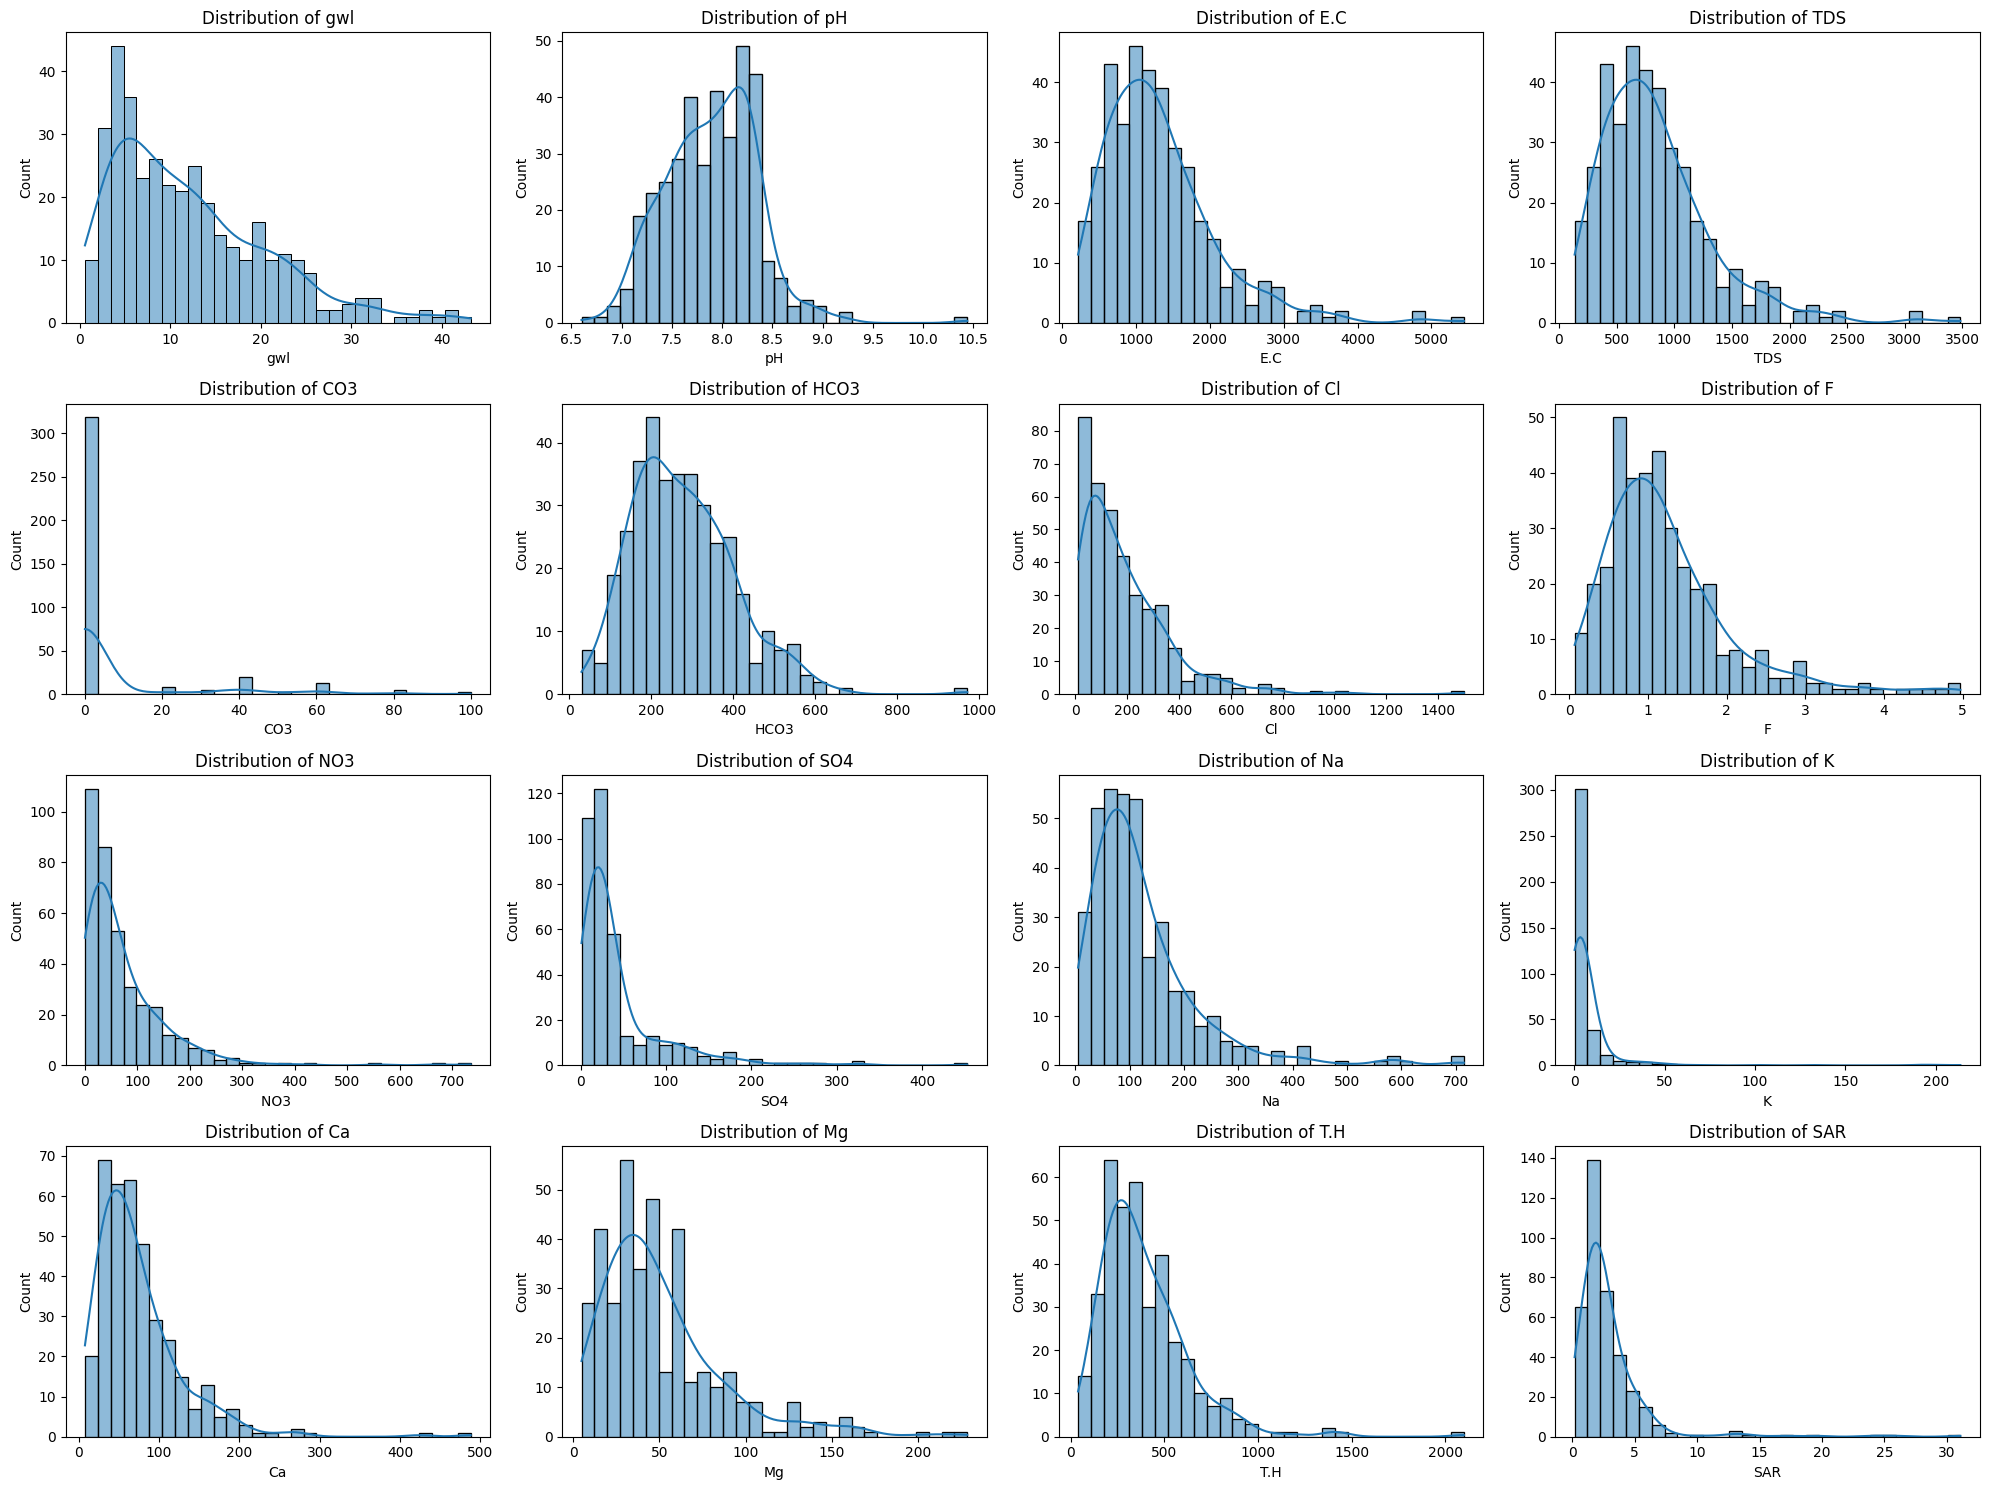

In [ ]:
# Correcting the column name in our subset list
import matplotlib.pyplot as plt
import seaborn as sns
# Selecting a subset of numerical columns for visualization
numerical_cols = ['gwl', 'pH', 'E.C', 'TDS', 'CO3', 'HCO3', 'Cl', 'F', 'NO3', 'SO4', 'Na', 'K', 'Ca', 'Mg', 'T.H', 'SAR']
numerical_cols[numerical_cols.index('NO3')] = 'NO3 '

# Replotting histograms for the numerical columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

Distribution of Numerical Variables

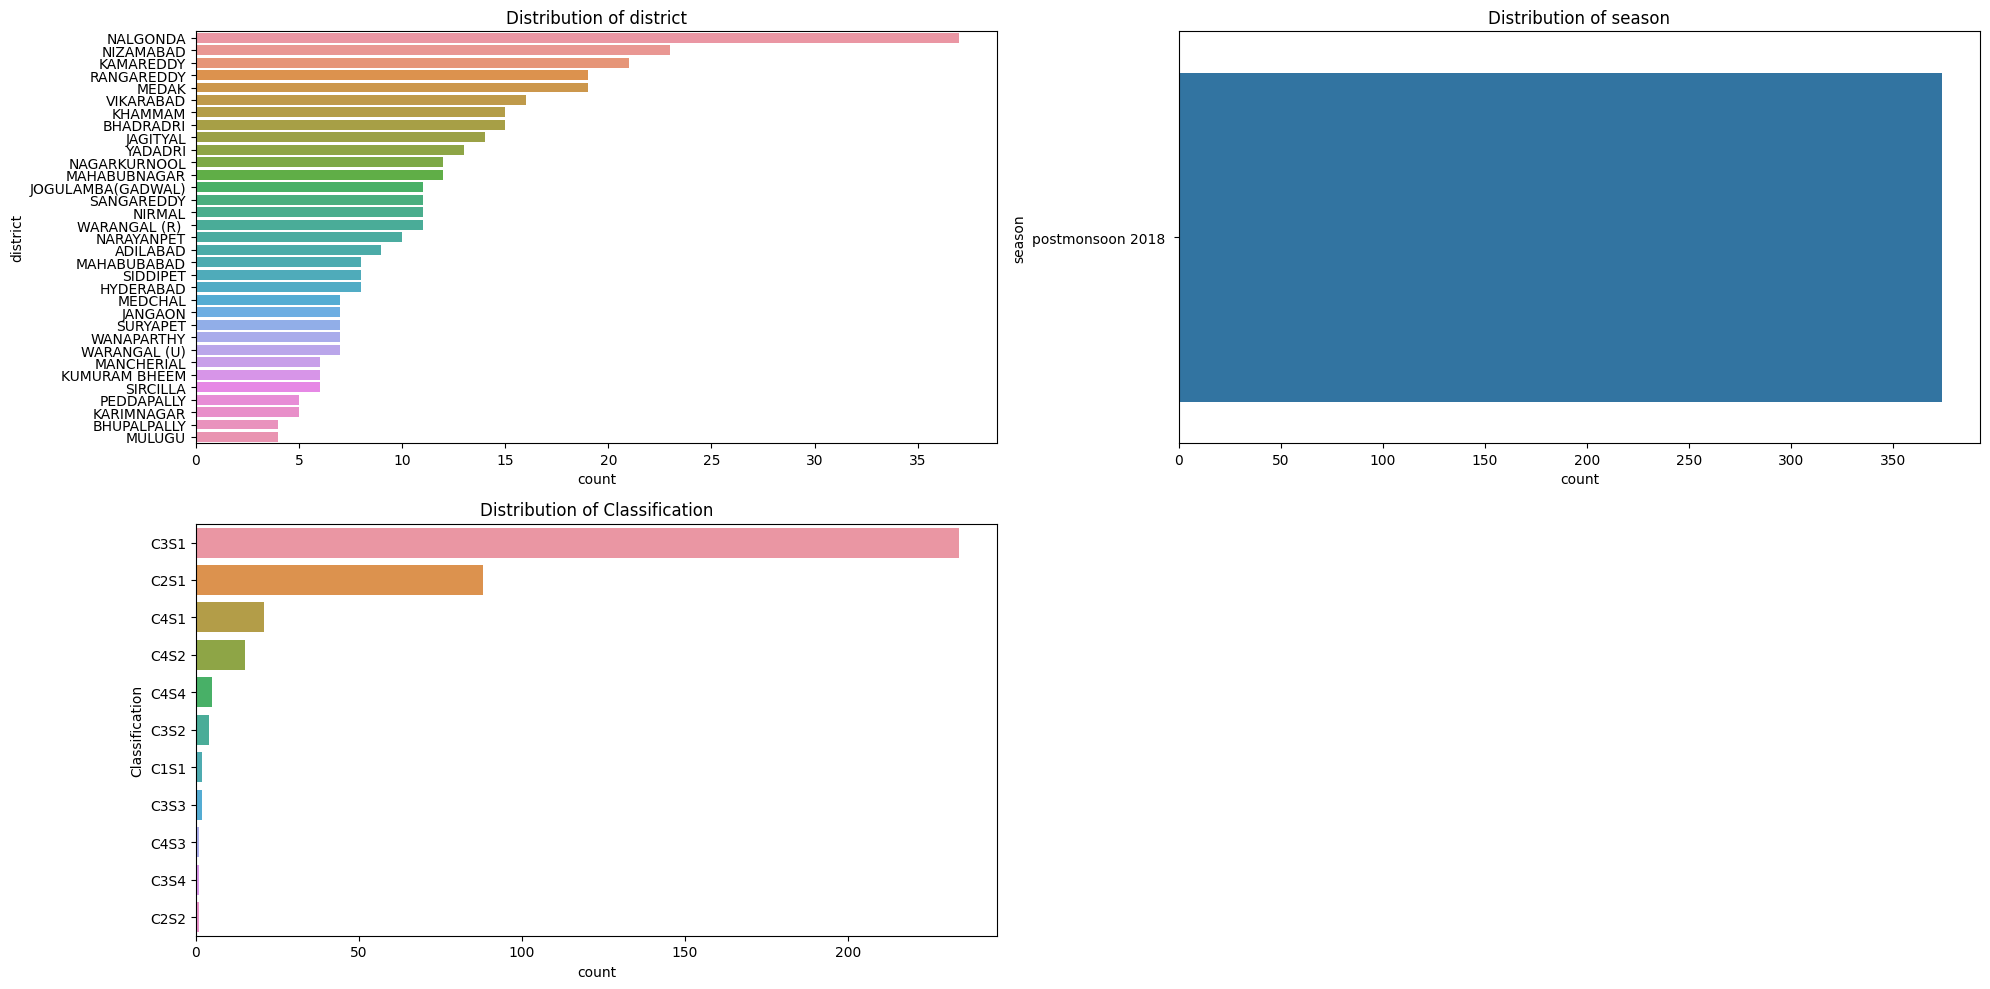

In [ ]:
# Selecting a subset of categorical columns for visualization
categorical_cols = ['district', 'season', 'Classification']

# Plotting bar plots for the categorical columns
plt.figure(figsize=(20, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

Correlation

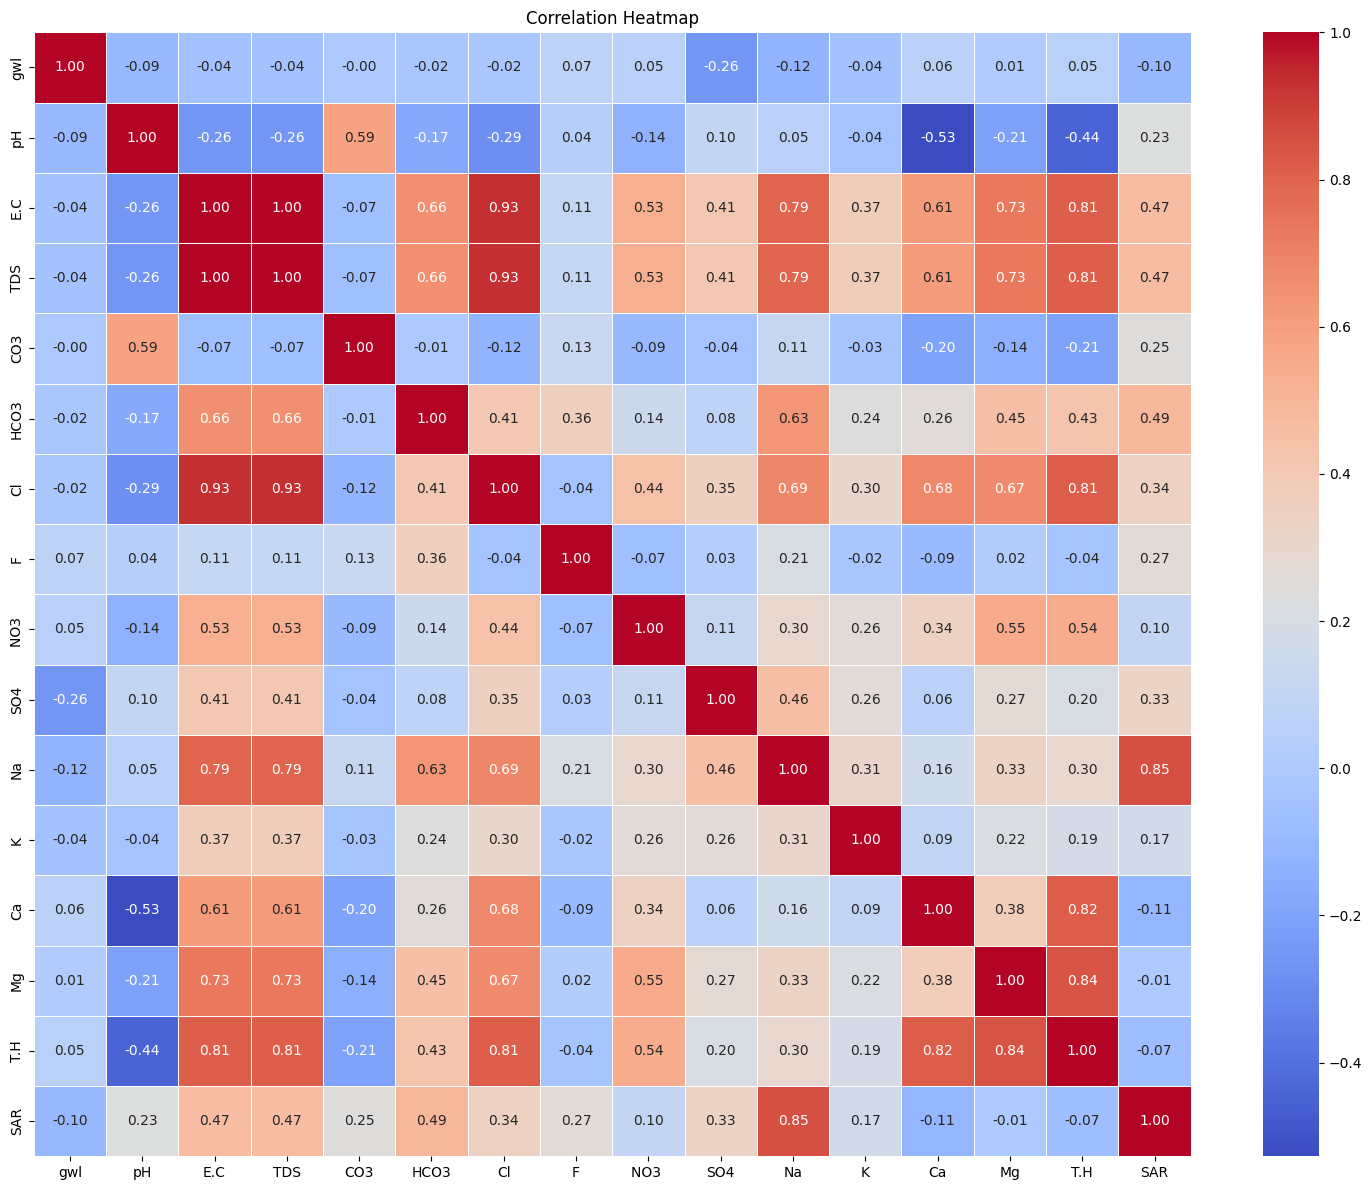

In [ ]:
# Calculating the correlation matrix
correlation_matrix = data[numerical_cols].corr()

# Plotting the heatmap for correlations
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

**Handling Missing Values**

Check for Missing Values

In [ ]:
# Checking for missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]

missing_values

gwl    3
dtype: int64

Deciding on Imputation or Removal Strategies

In [ ]:
# Imputing missing values in 'gwl' column with its median value
median_gwl = data['gwl'].median()
data['gwl'].fillna(median_gwl, inplace=True)

# Checking again for missing values to confirm imputation
missing_values_after_imputation = data.isnull().sum()
missing_values_after_imputation = missing_values_after_imputation[missing_values_after_imputation > 0]

missing_values_after_imputation

Series([], dtype: int64)

**Outlier Detection**

Detecting Outliers

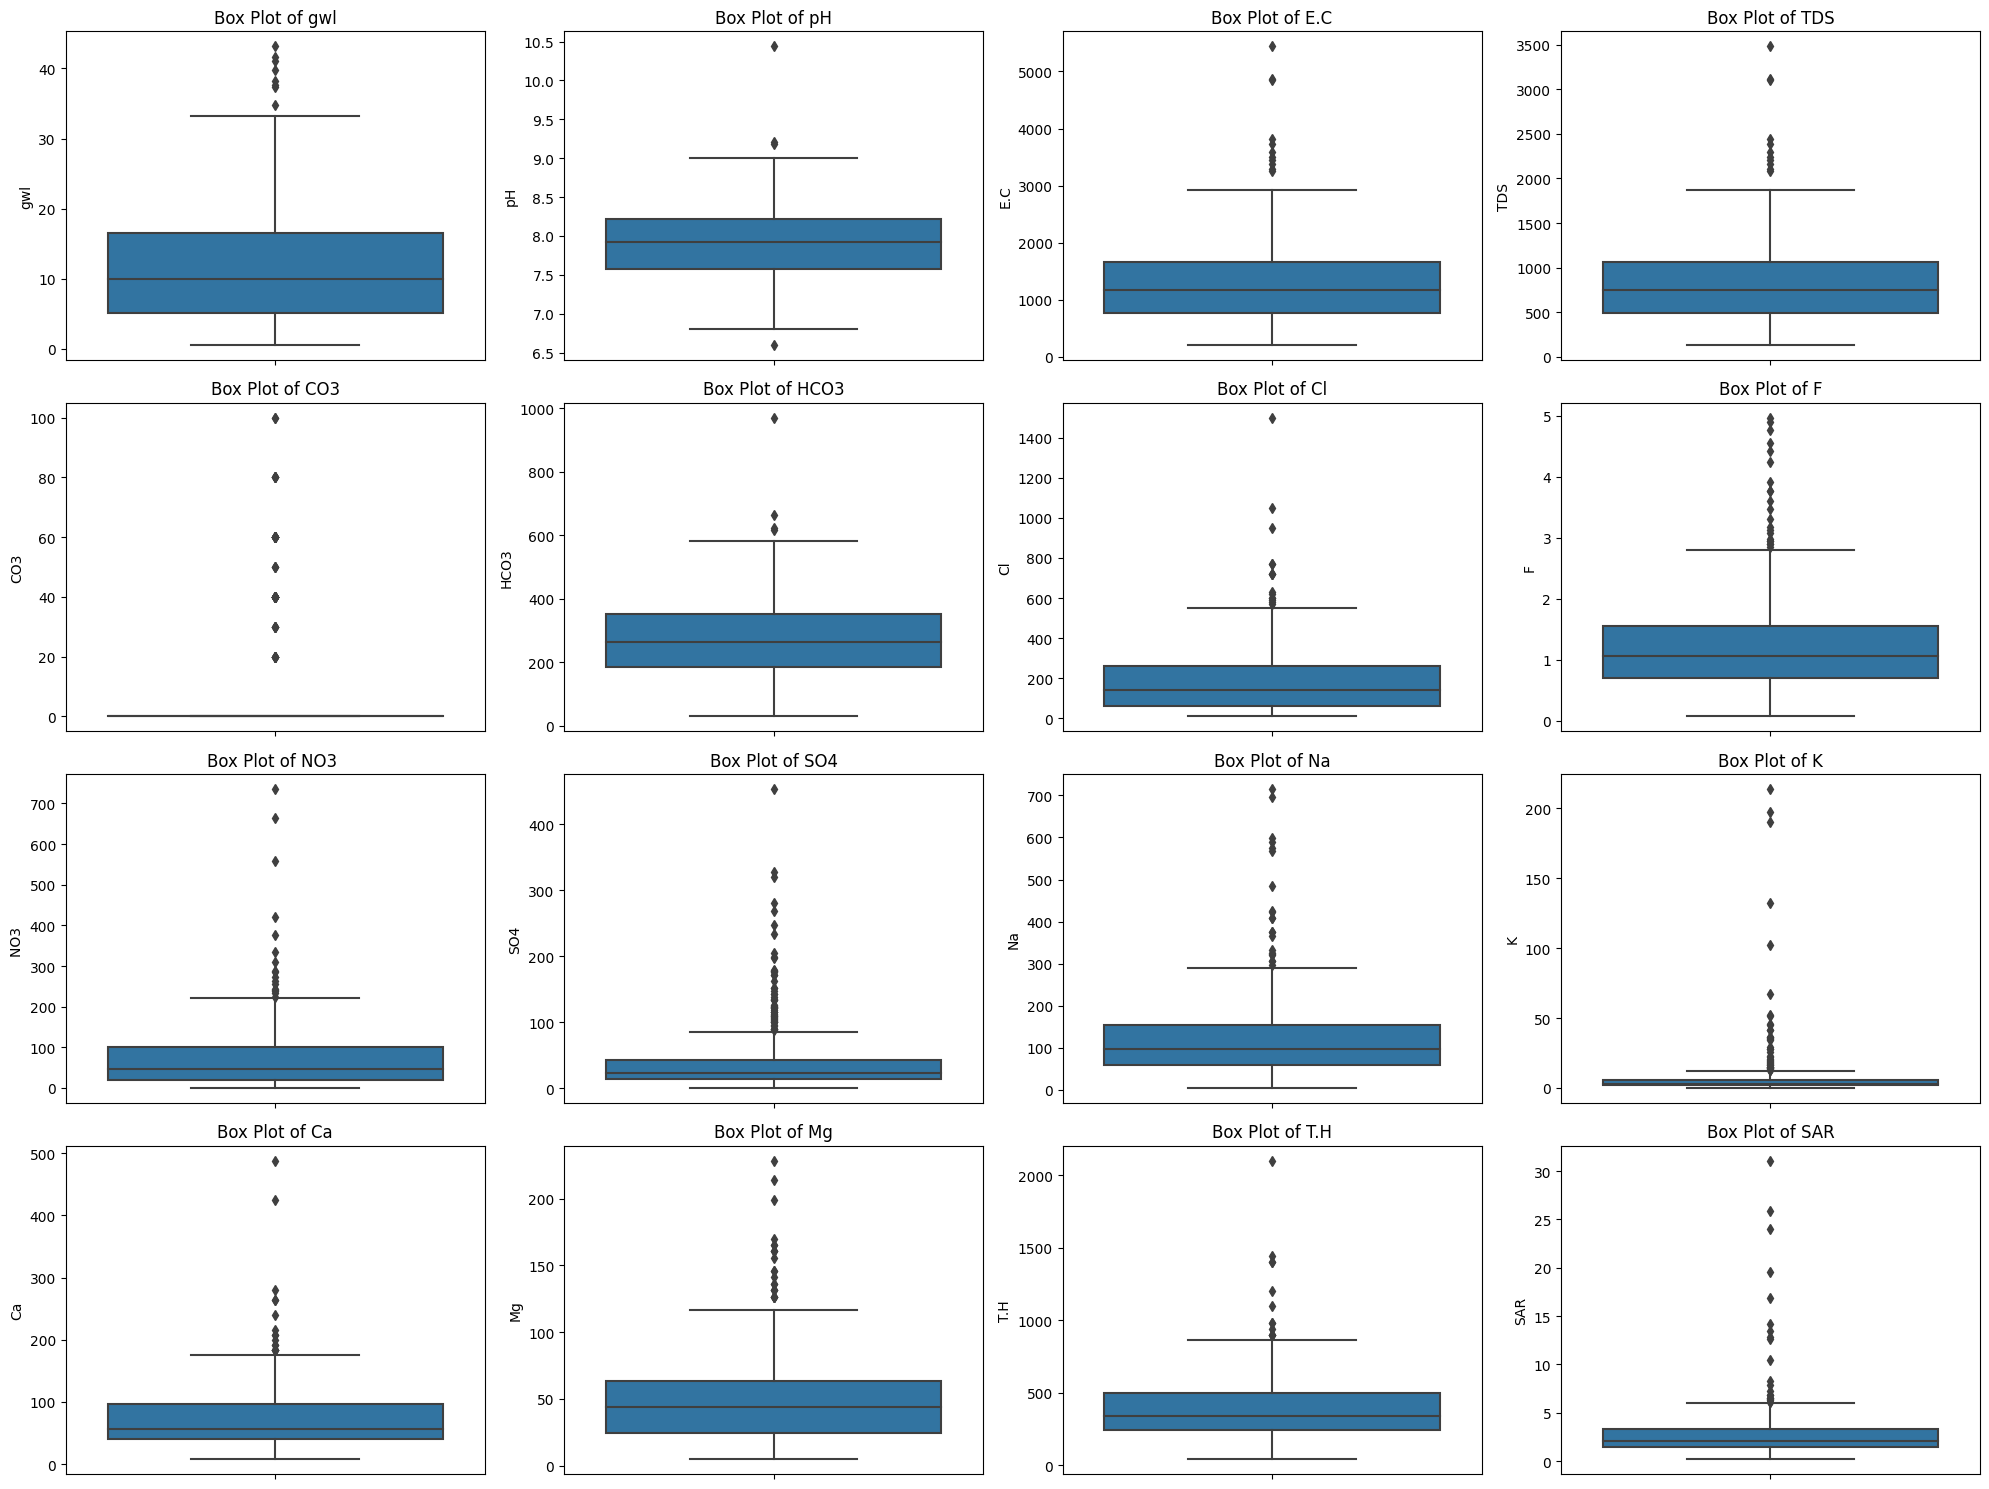

In [ ]:
# Plotting box plots for the numerical columns to detect outliers
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=data[col])
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()

plt.show()

Deciding on Outlier Handling Techniques & handling outliers using the IQR method

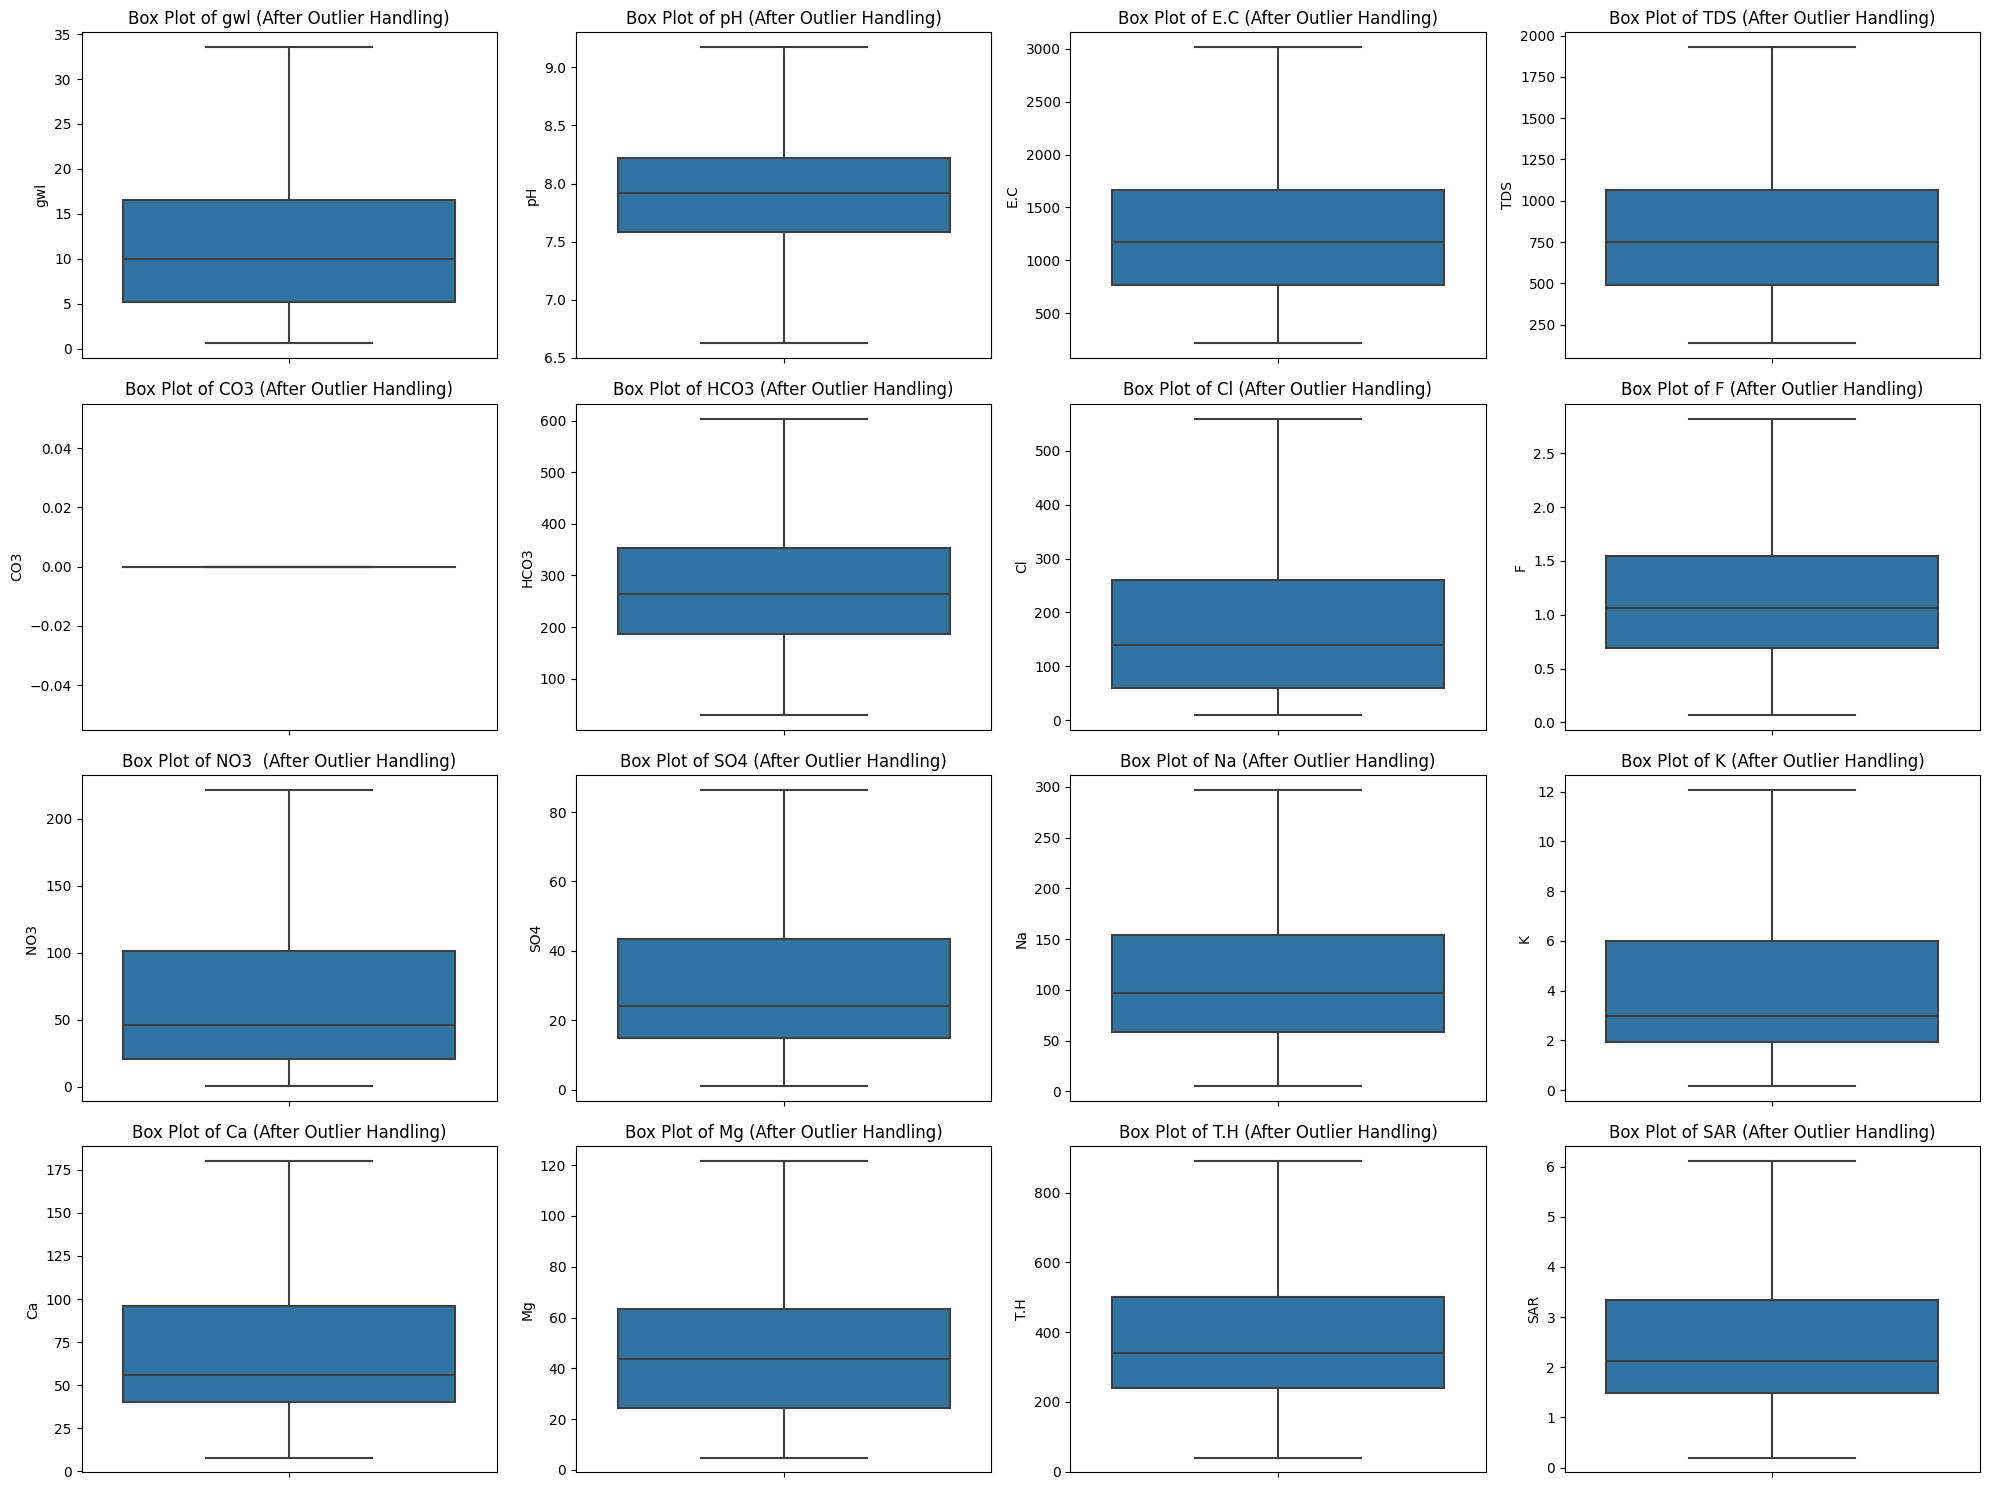

In [ ]:
# Handling outliers using the IQR method

for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[col] = data[col].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)

# Re-plotting box plots after handling outliers to visualize the changes
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=data[col])
    plt.title(f'Box Plot of {col} (After Outlier Handling)')
    plt.tight_layout()

plt.show()

**Data Preprocessing**

**Feature Engineering - Encoding Categorical Variables**

In [ ]:
# One-Hot Encoding the 'Classification' column
data_encoded = pd.get_dummies(data, columns=['Classification'], drop_first=True)

# Checking the first few rows of the encoded dataset
data_encoded_head = data_encoded.head()

data_encoded_head

,sno,district,mandal,village,lat_gis,long_gis,gwl,season,pH,E.C,...,Classification_C2S1,Classification_C2S2,Classification_C3S1,Classification_C3S2,Classification_C3S3,Classification_C3S4,Classification_C4S1,Classification_C4S2,Classification_C4S3,Classification_C4S4
0,1,ADILABAD,Adilabad,Adilabad,19.668300,78.524700,5.09,postmonsoon 2018,8.28,745.0,...,1,0,0,0,0,0,0,0,0,0
1,2,ADILABAD,Bazarhatnur,Bazarhatnur,19.458888,78.350833,5.10,postmonsoon 2018,8.29,921.0,...,0,0,1,0,0,0,0,0,0,0
2,3,ADILABAD,Gudihatnoor,Gudihatnoor,19.525555,78.512222,4.98,postmonsoon 2018,7.69,510.0,...,1,0,0,0,0,0,0,0,0,0
3,4,ADILABAD,Jainath,Jainath,19.730555,78.640000,5.75,postmonsoon 2018,8.09,422.0,...,1,0,0,0,0,0,0,0,0,0
4,5,ADILABAD,Narnoor,Narnoor,19.495665,78.852654,2.15,postmonsoon 2018,8.21,2321.0,...,0,0,0,0,0,0,0,1,0,0


**Feature Engineering - Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Selecting the numerical columns for scaling
columns_to_scale = numerical_cols

# Scaling the numerical features
scaler = StandardScaler()
data_encoded[columns_to_scale] = scaler.fit_transform(data_encoded[columns_to_scale])

# Checking the first few rows after scaling
data_encoded_scaled_head = data_encoded.head()

data_encoded_scaled_head[columns_to_scale].head()

,gwl,pH,E.C,TDS,CO3,HCO3,Cl,F,NO3,SO4,Na,K,Ca,Mg,T.H,SAR
0,-0.842533,0.890733,-0.806278,-0.806278,0.0,-0.467234,-0.822387,-1.104656,-0.415555,0.429736,-0.861578,-0.097882,-0.519227,-0.320957,-0.509216,-0.841886
1,-0.841302,0.913557,-0.542956,-0.542956,0.0,-0.384461,-0.684183,-0.928237,0.529369,1.251492,-0.953646,0.182446,-0.336803,0.484574,0.091265,-1.077937
2,-0.856070,-0.455909,-1.157873,-1.157873,0.0,-0.632779,-1.029693,-0.781220,-0.428589,0.355030,-0.914188,-0.658539,-1.066501,-0.320957,-0.809559,-0.811766
3,-0.761313,0.457069,-1.289534,-1.289534,0.0,-0.963869,-1.167897,-0.898833,-0.927117,0.018857,-1.150936,-0.938867,-0.884076,-0.965381,-1.109738,-1.068113
4,-1.204332,0.730962,1.551650,1.551650,0.0,0.194946,1.112467,2.012087,0.985539,1.939013,2.399512,0.182446,-0.336803,1.451211,0.691705,2.048004


**Feature Selection - correlation-based feature selection**

In [ ]:
# Computing the correlation matrix for our numerical features
correlation_matrix = data_encoded[columns_to_scale].corr()

# Identifying pairs of features with high absolute correlation
high_correlation_pairs = {}
for col in correlation_matrix.columns:
    for idx in correlation_matrix.index:
        if abs(correlation_matrix.loc[idx, col]) > 0.9 and idx != col:
            if (col, idx) not in high_correlation_pairs and (idx, col) not in high_correlation_pairs:
                high_correlation_pairs[(idx, col)] = correlation_matrix.loc[idx, col]

high_correlation_pairs

{('TDS', 'E.C'): 1.0,
 ('Cl', 'E.C'): 0.9251162230776284,
 ('Cl', 'TDS'): 0.9251162230776284,
 ('SAR', 'Na'): 0.920893270737403}

**Clustering and Anomaly Detection**

In [ ]:
# Selecting a subset of most relevant features for clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data_minimal = pd.read_csv('ground_water_quality_2018_post.csv')
selected_features = ['pH', 'E.C', 'Na', 'Ca', 'Mg', 'Cl', 'SO4', 'HCO3']
clustering_data_minimal = data_minimal[selected_features]

# Scaling the selected features
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data_minimal)

# Sampling a fraction (30%) of the data for simplified clustering
clustering_data_sampled = clustering_data_minimal.sample(frac=0.3, random_state=42)

# Scaling the sampled data
clustering_data_sampled_scaled = scaler.transform(clustering_data_sampled)

# Performing K-Means clustering with k=3 on the sampled data
kmeans_sampled = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters_sampled = kmeans_sampled.fit_predict(clustering_data_sampled_scaled)

# Assigning cluster labels to the sampled data
clustering_data_sampled['Cluster'] = clusters_sampled

# Analyzing the average values of each feature within each cluster for the sampled data
cluster_analysis_sampled = clustering_data_sampled.groupby('Cluster').mean()

cluster_analysis_sampled

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,pH,E.C,Na,Ca,Mg,Cl,SO4,HCO3
Cluster,,,,,,,,
0,7.545278,1634.527778,126.408641,107.777778,65.907111,258.611111,32.368056,316.119193
1,8.090469,784.484375,72.189941,43.375000,33.274313,70.156250,39.144531,217.783689
2,7.675000,3405.416667,421.664548,129.333333,105.343333,708.333333,95.520833,466.818836


**Principal Component Analysis (PCA)**

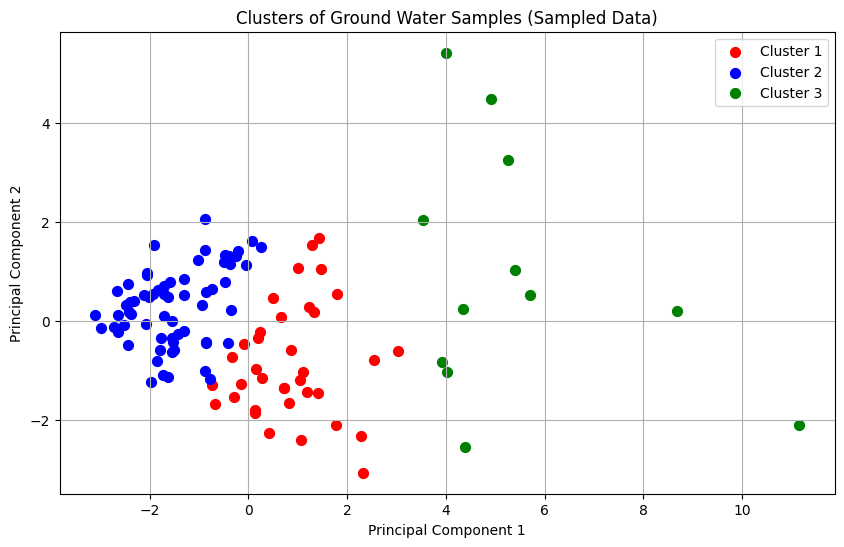

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
clustering_data_2D = pca.fit_transform(clustering_data_sampled_scaled)
# Visualizing the clusters in a 2D scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(clustering_data_2D[clusters_sampled == 0, 0], clustering_data_2D[clusters_sampled == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(clustering_data_2D[clusters_sampled == 1, 0], clustering_data_2D[clusters_sampled == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(clustering_data_2D[clusters_sampled == 2, 0], clustering_data_2D[clusters_sampled == 2, 1], s=50, c='green', label='Cluster 3')
plt.title('Clusters of Ground Water Samples (Sampled Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Analyzing the distribution of samples in each cluster
cluster_distribution = clustering_data_sampled['Cluster'].value_counts().sort_index()

cluster_distribution

0    36
1    64
2    12
Name: Cluster, dtype: int64

In [ ]:
# Extracting the cluster centroids in the original feature space
cluster_centroids = pd.DataFrame(scaler.inverse_transform(kmeans_sampled.cluster_centers_), columns=selected_features)

cluster_centroids

,pH,E.C,Na,Ca,Mg,Cl,SO4,HCO3
0,7.545278,1634.527778,126.408641,107.777778,65.907111,258.611111,32.368056,316.119193
1,8.090469,784.484375,72.189941,43.375000,33.274313,70.156250,39.144531,217.783689
2,7.675000,3405.416667,421.664548,129.333333,105.343333,708.333333,95.520833,466.818836


In [ ]:
# Calculating the variance of each feature within each cluster
cluster_variance = clustering_data_sampled.groupby('Cluster').var()

cluster_variance

,pH,E.C,Na,Ca,Mg,Cl,SO4,HCO3
Cluster,,,,,,,,
0,0.168728,129193.684921,3355.448882,2214.349206,1155.536506,7669.444444,1138.794593,11387.971552
1,0.105420,96039.841022,2447.238562,487.222222,349.121476,2696.800595,1582.245644,7747.756078
2,0.377827,772900.083333,26149.563179,12716.606061,3732.103613,78233.333333,7904.937027,6518.204735


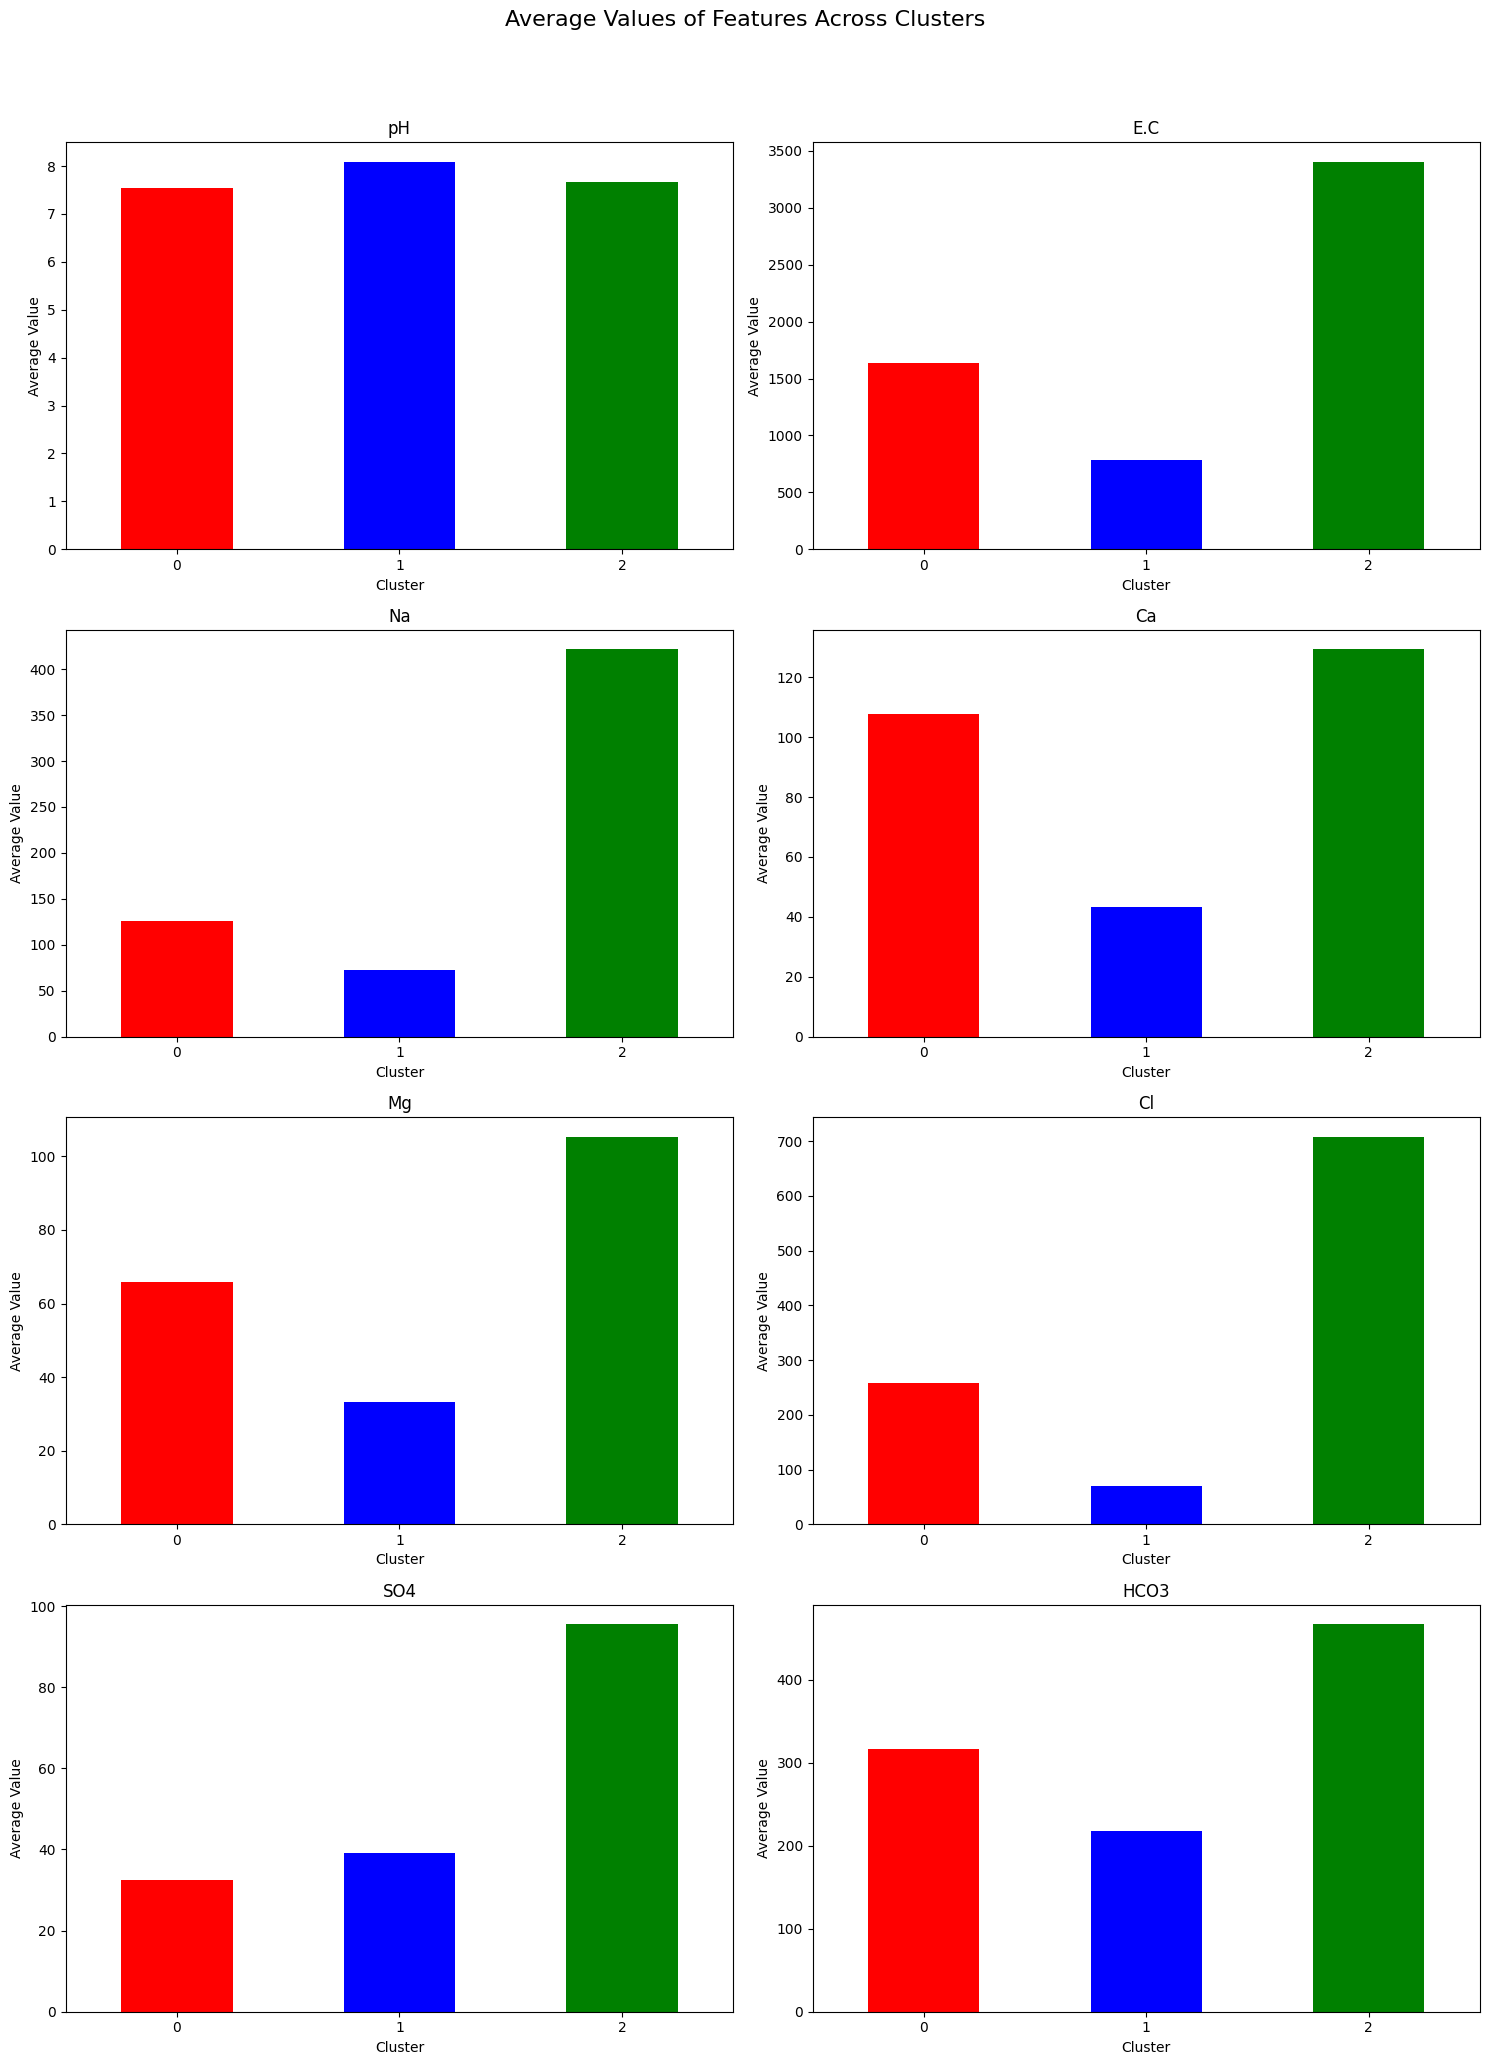

In [ ]:
# Plotting the average values of each feature across clusters
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
fig.suptitle('Average Values of Features Across Clusters', fontsize=16, y=1.03)

for idx, feature in enumerate(selected_features):
    ax = axes[idx // 2, idx % 2]
    cluster_analysis_sampled[feature].plot(kind='bar', ax=ax, color=['red', 'blue', 'green'])
    ax.set_title(feature)
    ax.set_ylabel('Average Value')
    ax.set_xlabel('Cluster')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

**Spatial distribution of these clusters**

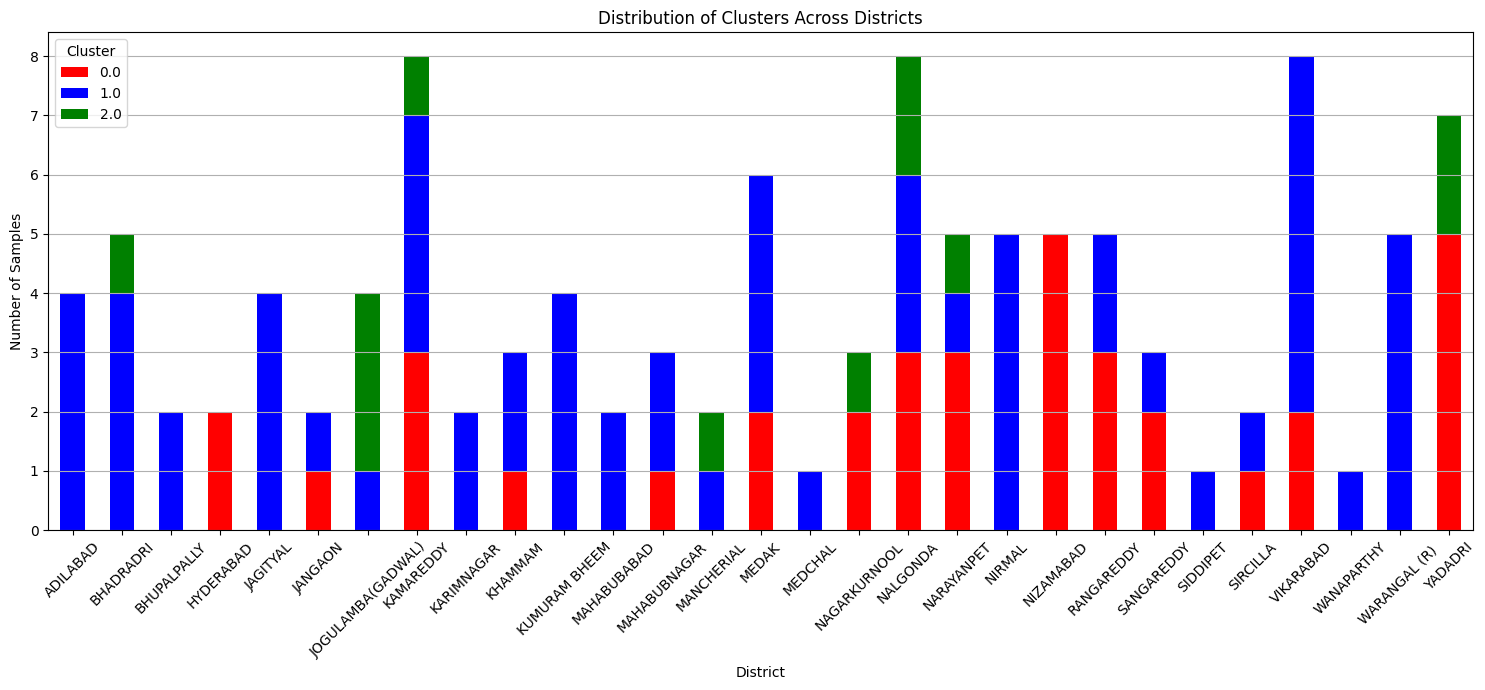

In [ ]:
# Merging the clusters with the original data to get the spatial columns (district, mandal, village)
spatial_data_with_clusters = pd.concat([data_minimal[['district', 'mandal', 'village']], clustering_data_sampled['Cluster']], axis=1).dropna()

# Examining the distribution of clusters across different districts
district_cluster_distribution = spatial_data_with_clusters.groupby(['district', 'Cluster']).size().unstack().fillna(0)

# Plotting the distribution
district_cluster_distribution.plot(kind='bar', stacked=True, figsize=(15, 7), color=['red', 'blue', 'green'])
plt.title('Distribution of Clusters Across Districts')
plt.ylabel('Number of Samples')
plt.xlabel('District')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing subsets
X = clustering_data_sampled[selected_features]
y = clustering_data_sampled['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape

((89, 8), (23, 8))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initializing the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=5000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Training and evaluating the models
model_accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy

model_accuracies

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8260869565217391,
 'Decision Tree': 0.8260869565217391,
 'Random Forest': 0.9130434782608695,
 'SVM': 0.9130434782608695}

**Ensemble methods**

In [ ]:
from sklearn.ensemble import StackingClassifier

# Defining the base models
base_models = [
    ('Logistic Regression', models['Logistic Regression']),
    ('Decision Tree', models['Decision Tree']),
    ('Random Forest', models['Random Forest']),
    ('SVM', models['SVM'])
]

# Initializing the Stacking Classifier with Logistic Regression as the meta-model
stacked_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(max_iter=5000), cv=5)
stacked_model.fit(X_train, y_train)

# Evaluating the stacked model's performance on the test data
stacked_accuracy = accuracy_score(y_test, stacked_model.predict(X_test))

stacked_accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.9130434782608695